<a href="https://colab.research.google.com/github/R267/Pryklad_analyz_exam/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rinichristy_covid19_coronavirus_pandemic_path = kagglehub.dataset_download('rinichristy/covid19-coronavirus-pandemic')

print('Data source import complete.')


100%|██████████| 8.60k/8.60k [00:00<00:00, 2.50MB/s]

Extracting files...
Data source import complete.


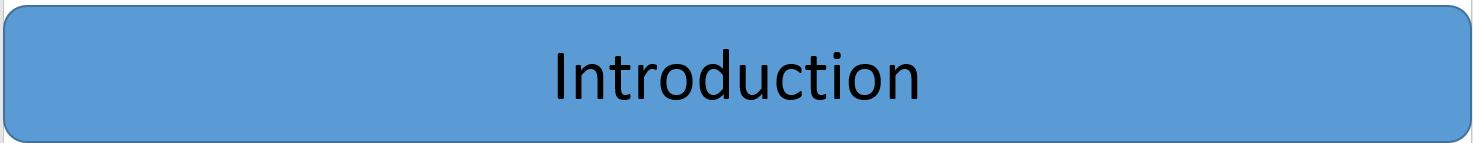

COVID-19: Огляд
Що таке COVID-19?
Коронавірусна хвороба 2019 (COVID-19) — це заразна хвороба, спричинена вірусом SARS-CoV-2. Перший відомий випадок зафіксовано в грудні 2019 року у місті Ухань, Китай. Відтоді хвороба поширилася по всьому світу, спричинивши пандемію.

Симптоми
Зазвичай проявляються через 1-14 днів після зараження.

Основні симптоми: лихоманка, кашель, головний біль, втома, утруднене дихання, втрата смаку та запаху.

Приблизно 1/3 інфікованих не мають помітних симптомів.

З помітними симптомами: 81% — легкі або помірні (до легкої пневмонії), 14% — важкі (утруднене дихання, гіпоксія, ураження понад 50% легень), 5% — критичні (дихальна недостатність, шок, мультиорганна дисфункція).

Ризик важкого перебігу зростає з віком.

Деякі пацієнти мають тривалі наслідки (long COVID) — багатомісячні симптоми та пошкодження органів.

Шляхи передачі
Вірус поширюється через вдихання заражених аерозолів і крапель.

Найвищий ризик зараження — при близькому контакті, але можливий і на більших відстанях у закритих приміщеннях.

Передача можлива також через попадання заражених рідин на слизові (очі, ніс, рот) та рідко — через забруднені поверхні.

Інфіковані залишаються заразними до 20 днів, навіть без симптомів.

Діагностика
Стандартний метод: виявлення вірусної нуклеїнової кислоти за допомогою PCR (rRT-PCR), TMA або RT-LAMP з зразка із носоглотки.

Профілактика
Вакцинація — у багатьох країнах вже запущені масові кампанії.

Інші заходи: соціальна дистанція, карантин, вентиляція приміщень, гігієна рук, носіння масок у громадських місцях.

Зараз ведуться дослідження ліків, які можуть пригнічувати вірус.

Лікування
Переважно симптоматичне: підтримка життєвих функцій, ізоляція, експериментальні методи.



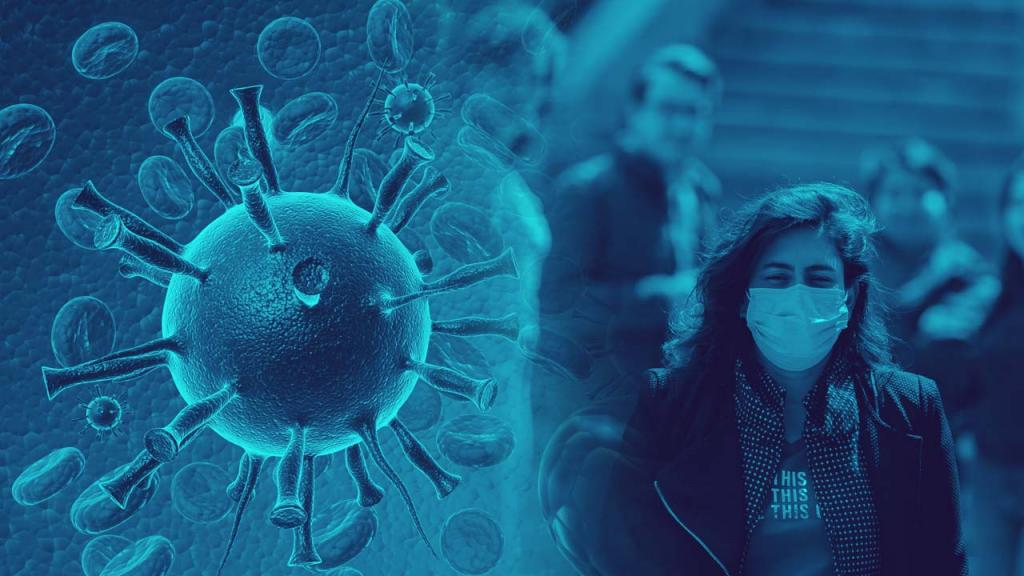

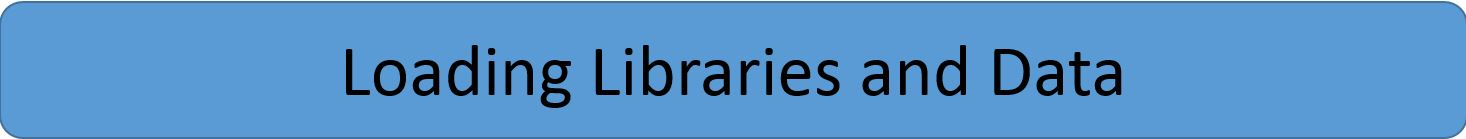

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import ydata_profiling  # нова назва pandas_profiling


In [4]:
train = pd.read_csv('/content/COVID-19 Coronavirus.csv',header=None)

In [5]:
train.rename(columns={0:'Country',
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'},inplace=True)

In [6]:
train.drop(index=0,inplace=True)

In [7]:
train['Population']=train['Population'].map(int)
train['Total Cases']=train['Total Cases'].map(int)
train['Total Deaths']=train['Total Deaths'].map(int)
train['TC1Mpop']=train['TC1Mpop'].map(int)
train['TD1Mpop']=train['TD1Mpop'].map(int)
train['Death percentage']=train['Death percentage'].map(float)

Цей етап трансформації даних був необхідний для виправлення некоректно сформованих або несумісних назв змінних у наборі даних, щоб забезпечити сумісність з інструментами аналізу та покращити загальну читабельність даних.

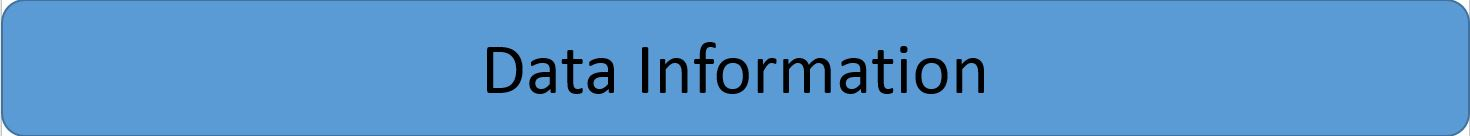

In [8]:
train

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
222,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
223,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
224,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [9]:
train.columns

Index(['Country', 'Other names', 'ISO', 'Population', 'Continent',
       'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop',
       'Death percentage'],
      dtype='object')

Країна (інші назви, ISO) — це окрема територіальна одиниця або політичне утворення. Вона може бути незалежною суверенною державою або частиною більшої держави, несамостійним чи колишнім суверенним політичним утворенням, фізичною територією з урядом або географічним регіоном, пов’язаним із групами народів, що мали незалежність або інші форми політичної асоціації. Країна не обов’язково є суверенною.

Населення — у демографії цей термін часто використовується для позначення загальної кількості людей, які живуть на даний момент. Станом на листопад 2021 року чисельність населення світу перевищила 7,9 мільярда. Для того, щоб чисельність людства досягла одного мільярда, знадобилося понад два мільйони років доісторії та історії, а щоб зрости до 7 мільярдів — лише ще 200 років.

Континент — це будь-яка з кількох великих масивів суходолу. Загалом континенти визначаються не суворими критеріями, а за загальноприйнятою домовленістю. Зазвичай виділяють сім континентів: Азія, Африка, Північна Америка, Південна Америка, Антарктида, Європа та Австралія. У нашому наборі даних континенти представлені як: Азія, Європа, Африка, Латинська Америка та Карибський басейн, Океанія, Північна Америка.

Загальна кількість випадків — кількість зареєстрованих заражень у країні.

Загальна кількість смертей — кількість зареєстрованих смертей у вибраній країні.

Кількість випадків/1 млн населення (Кількість смертей/1 млн населення) — кількість смертей або випадків зараження у країні, розрахована на 1 мільйон населення.

Відсоток смертності — відсоток померлих серед усіх заражених у вибраній країні.

## Нам потрібно переглянути типи наших даних.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 1 to 225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           225 non-null    object 
 1   Other names       224 non-null    object 
 2   ISO               225 non-null    object 
 3   Population        225 non-null    int64  
 4   Continent         225 non-null    object 
 5   Total Cases       225 non-null    int64  
 6   Total Deaths      225 non-null    int64  
 7   TC1Mpop           225 non-null    int64  
 8   TD1Mpop           225 non-null    int64  
 9   Death percentage  225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


Я пропоную видалити ознаки «інші назви», «ISO» через дублювання інформації.










In [11]:
train=train.drop(['Other names','ISO'],axis=1)

Після цієї трансформації таблиця є масивом даних розміром 225x8, де 6 ознак є числовими, а 2 — категоріальними.










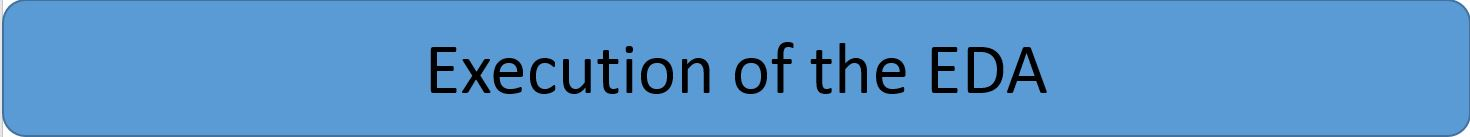

## Давайте подивимось на статистику набору даних.









In [12]:
train.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


На основі отриманої статистики спостерігаються викиди для мінімальних та максимальних значень кожної з ознак; у подальшому ми розглянемо природу цих викидів.







4o



## Давайте подивимось на обсяг відсутніх даних у наборі даних.










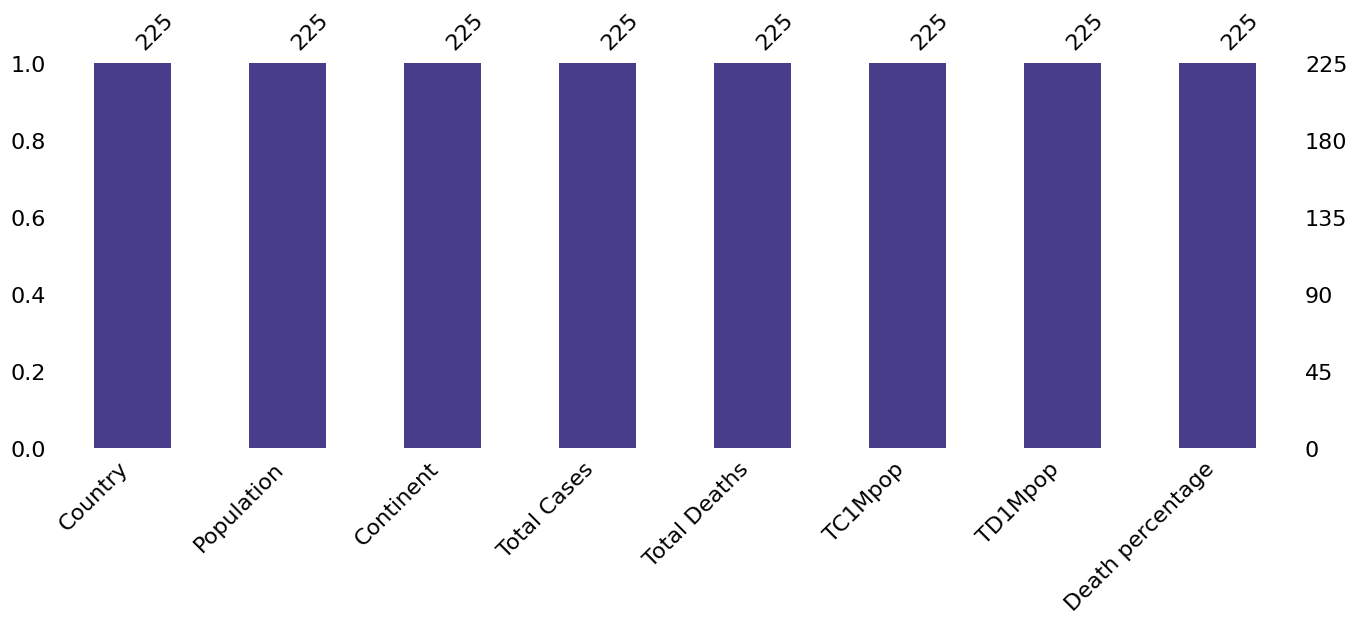

In [13]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

In [14]:
train.isnull().sum()

,0
Country,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
TC1Mpop,0
TD1Mpop,0
Death percentage,0


У наборі даних відсутні пропущені значення, що означає, що під час кореляційного аналізу не буде спотворення інформації.









## Давайте трохи проаналізуємо кожну з ознак.

In [15]:
train.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage'],
      dtype='object')

In [16]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']

## Антирейтинг у боротьбі з COVID










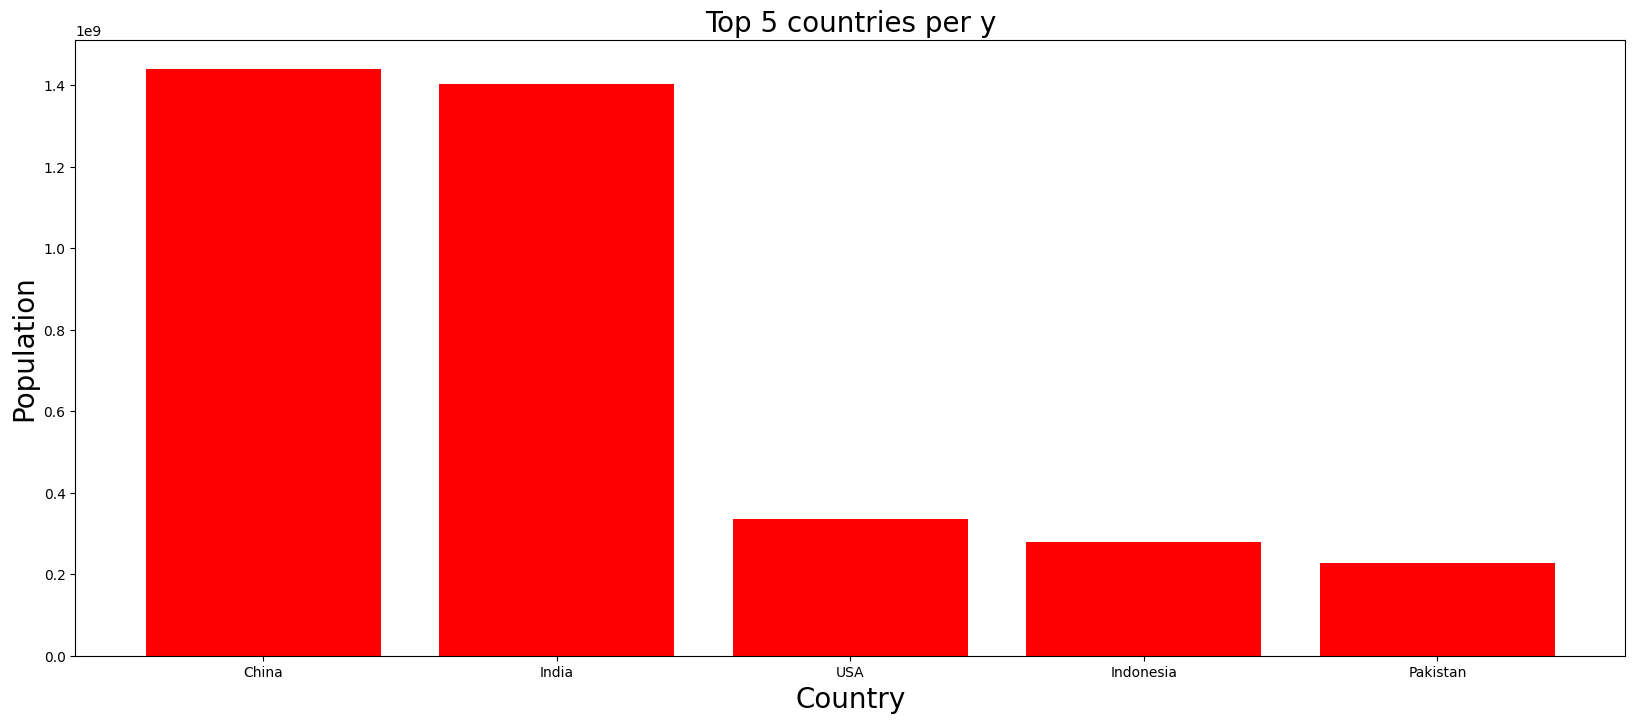

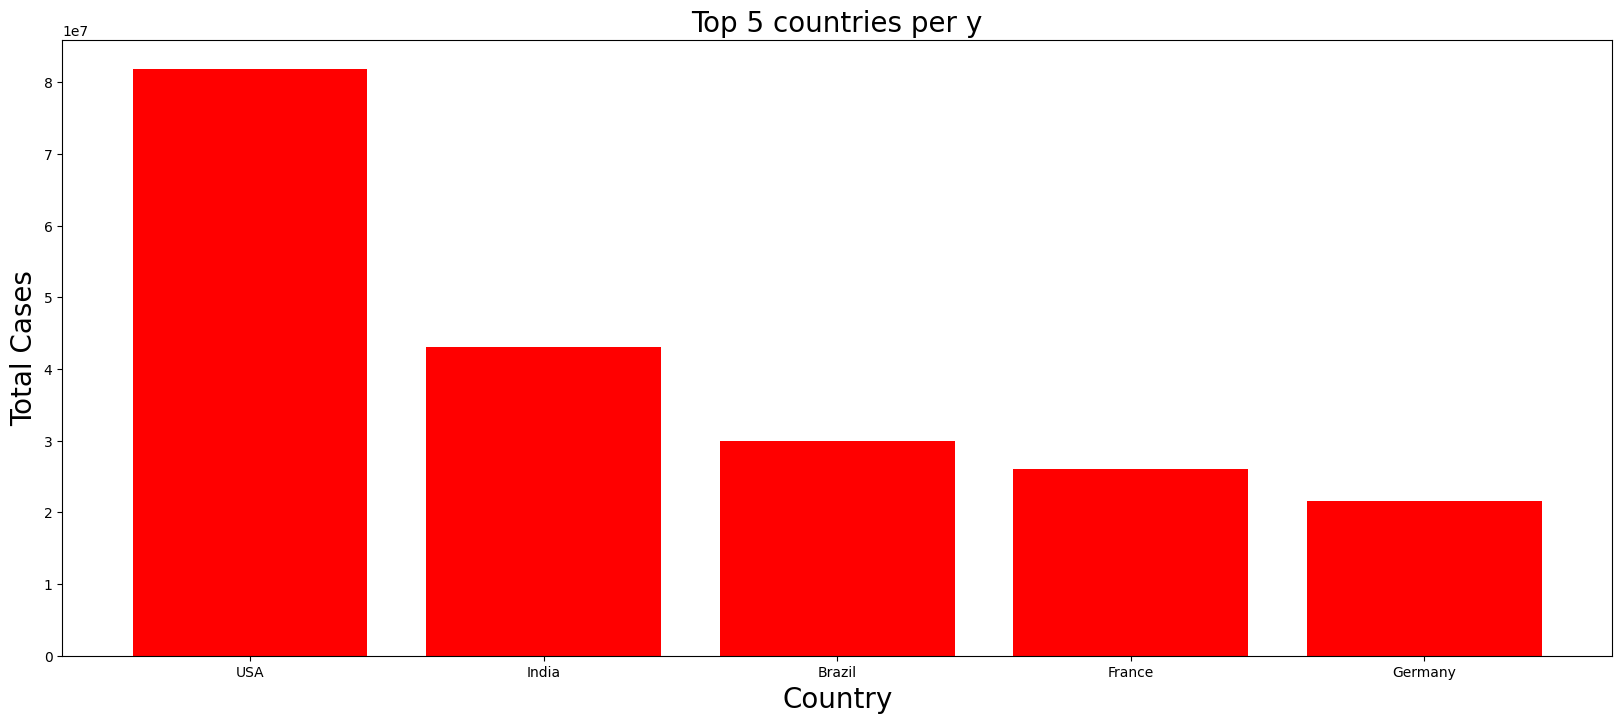

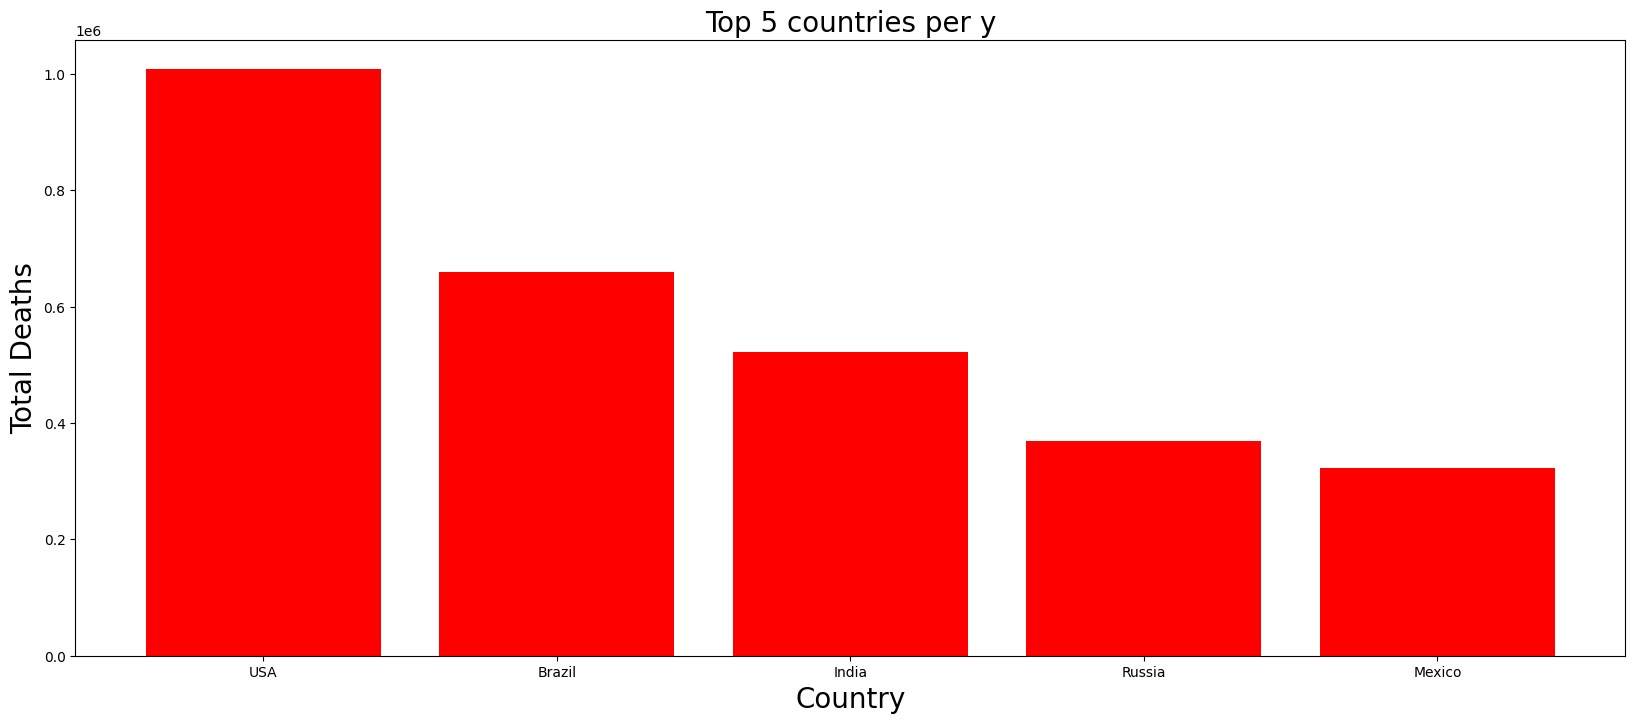

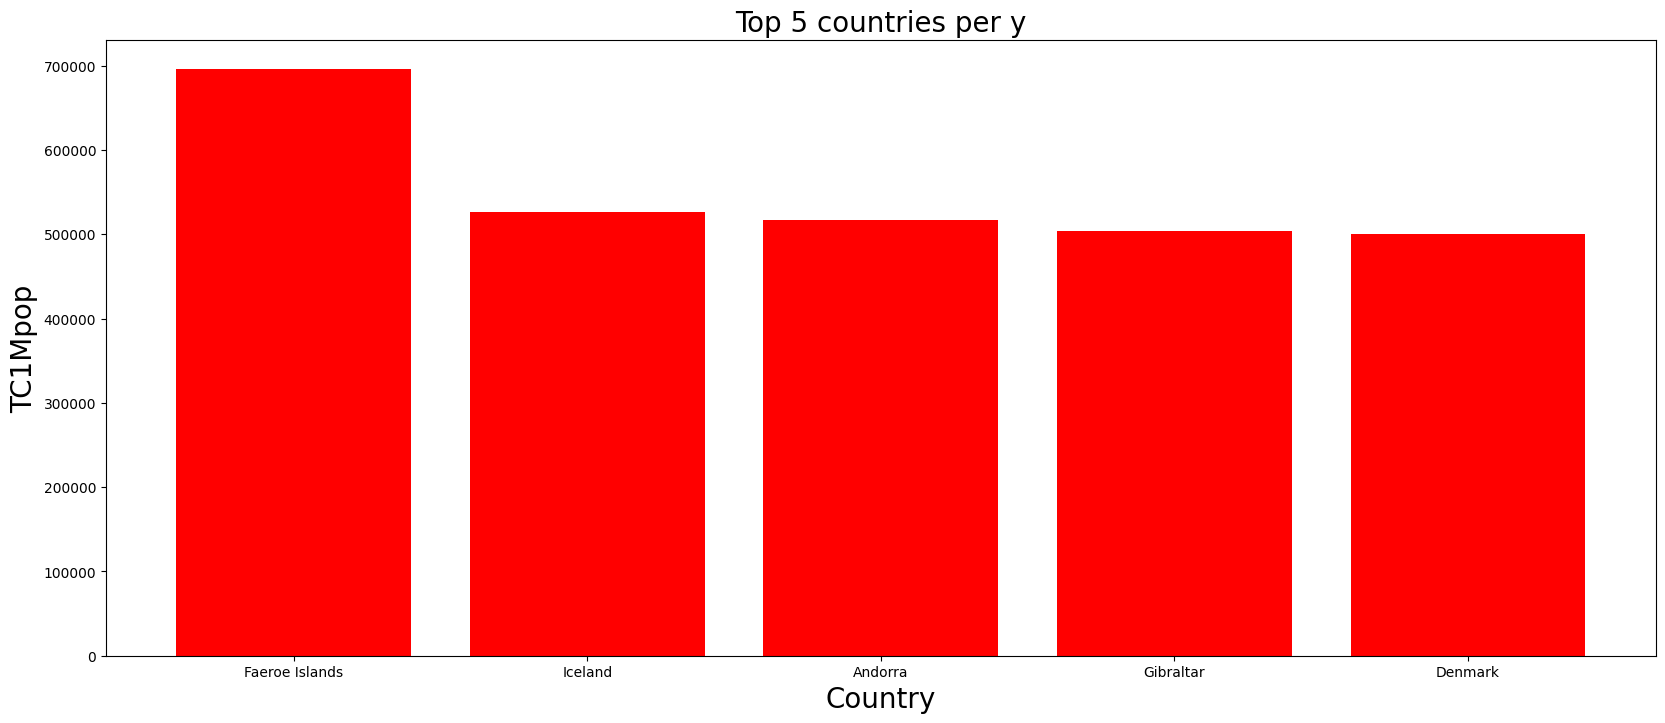

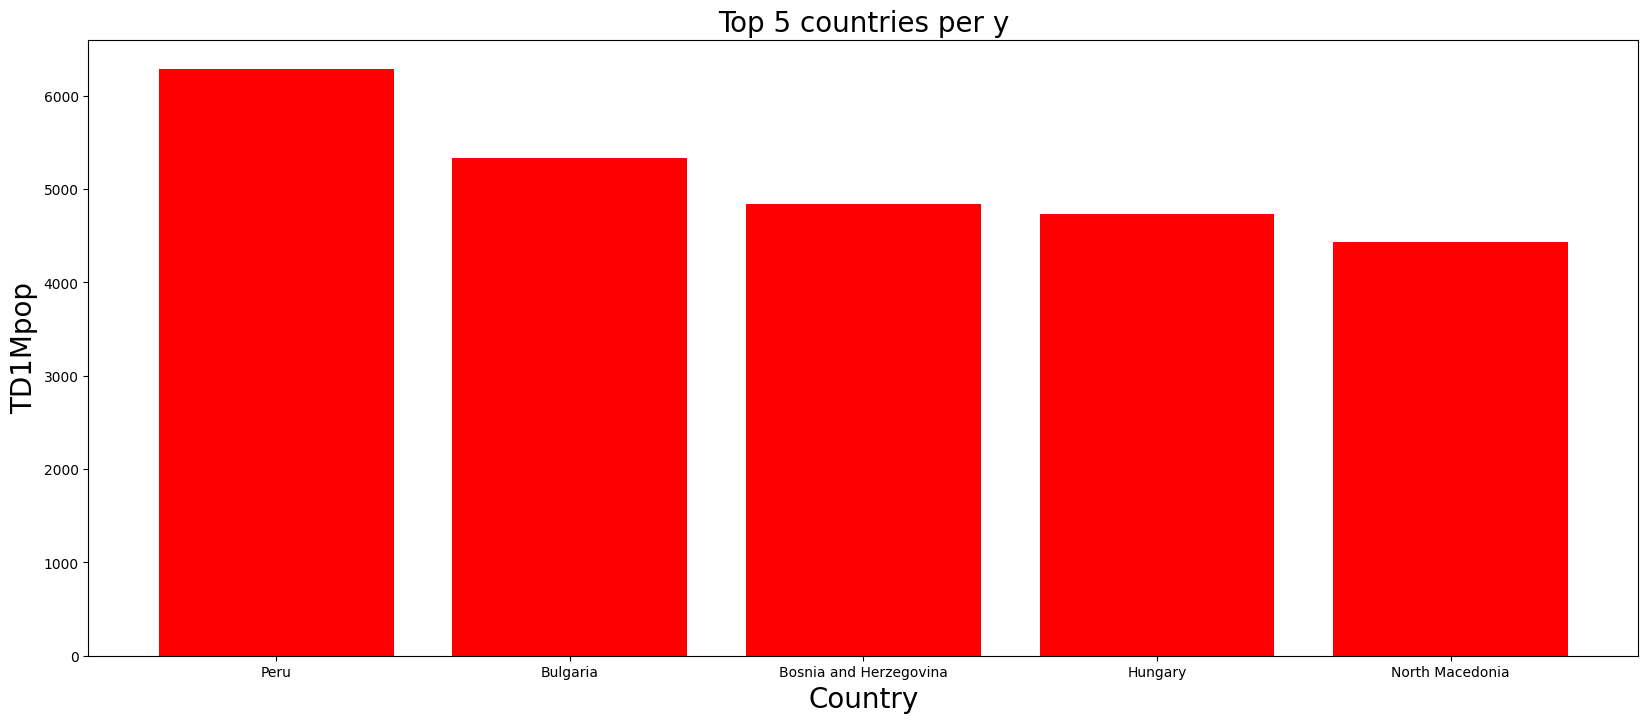

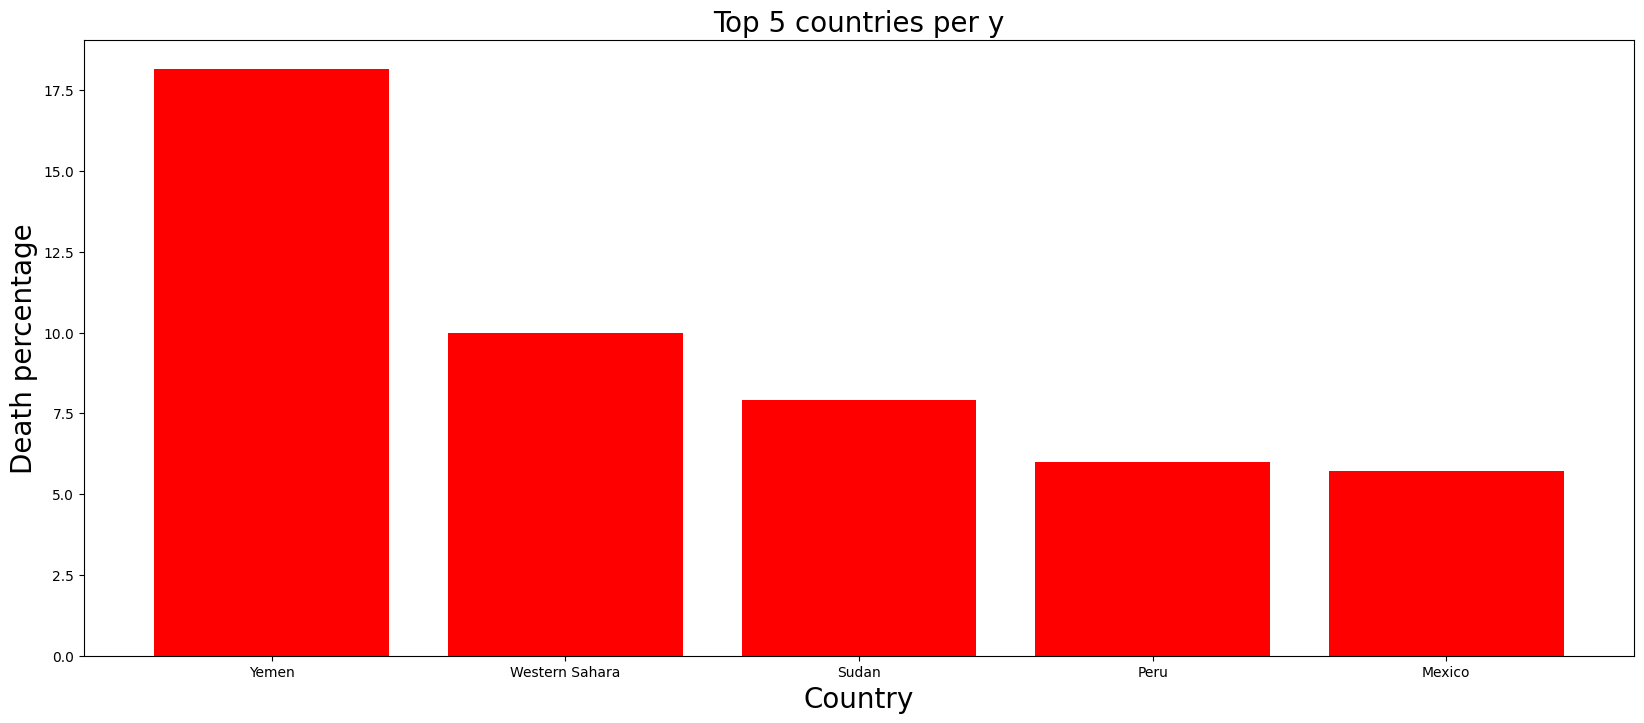

In [17]:
for column in columns:
  top5 = train.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color='red',alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

Оскільки кожна країна мала свої власні фактори потрапляння до рейтингу та антирейтингу щодо ситуації з COVID, то в одній діаграмі буде проведено аналіз для 1 країни. Загалом фактори, що сприяли смертності та поширенню інфекції в кожній країні, дуже схожі.

1 графік не потребує аналізу, тут показано населення у кожній з країн :)

На 2-му графіку я хотів би зупинитись на США. Вивчивши багато інформації, хочу відзначити деякі фактори, що сприяли поширенню COVID у цій країні: дорогі та недоступні ліки, ігнорування антиковідних заходів та фактор Трампа.

На 3-му графіку я хотів би розповісти про Росію. Не потрапивши до рейтингу за населенням, ця країна потрапила до рейтингу за кількістю смертей. Незважаючи на всі заходи, прийняті урядом та Міністерством охорони здоров’я, кількість смертей була дуже високою. Фактори, що вплинули на таку смертність — низький рівень медицини у невеликих містах, недовіра до лікарів, самолікування, велика частка літнього населення з хронічними захворюваннями.

Фігури 4 та 5 показують країни з малим населенням, тому таке порівняння некоректне.

На графіках 5 та 6 я хотів би розглянути Перу, яке є лідером нашого антирейтингу за цими показниками. Майже 200 тисяч смертей від COVID-19 у Перу сталися через нестабільність системи охорони здоров’я та відсутність передбачливості. Про це заявив міністр охорони здоров’я Перу Горасіо Севальйос. Ці висновки можна застосувати й до решти країн на Фігурі 6.

## Пропоную поглянути на країни, які менше постраждали від цієї підступної хвороби.










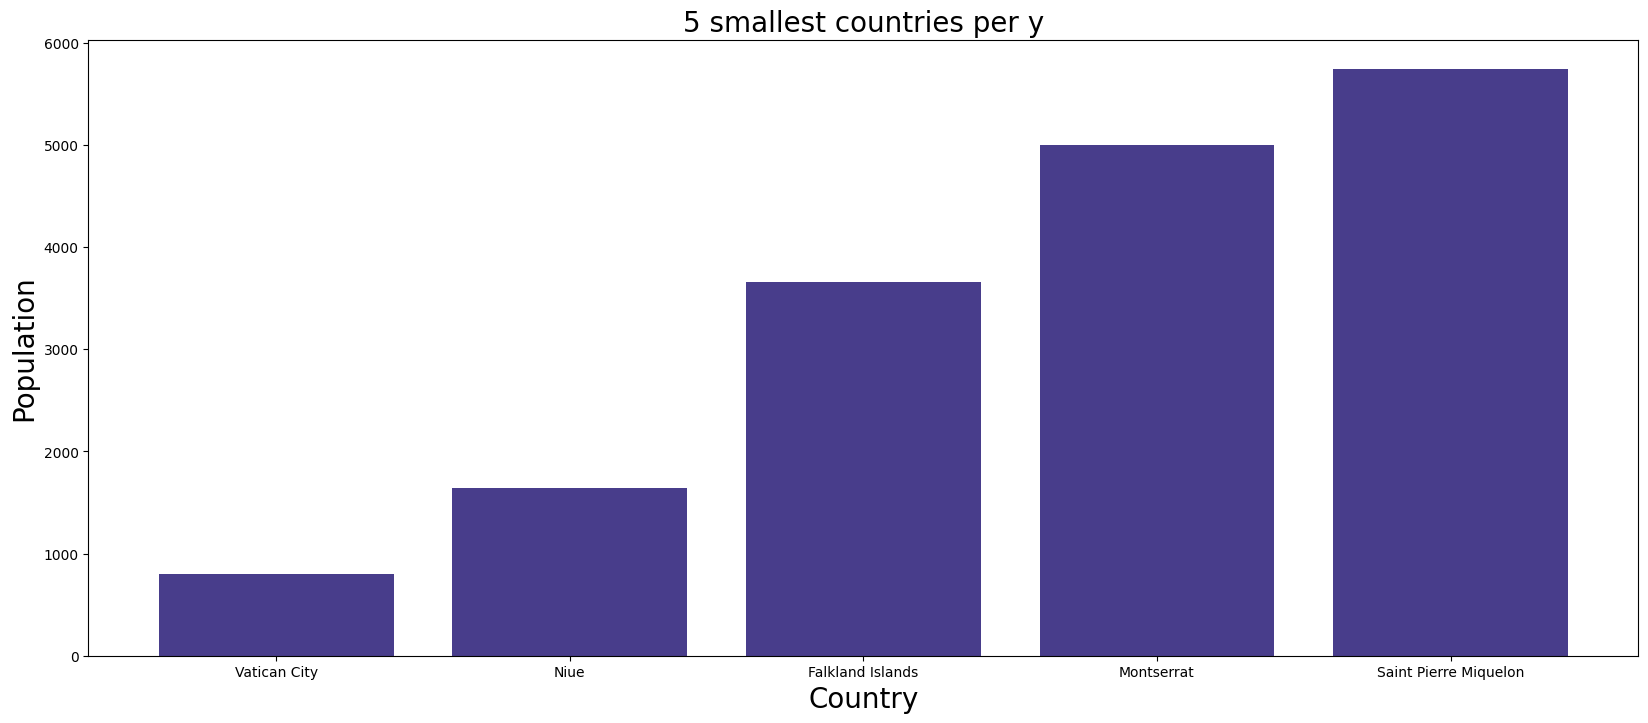

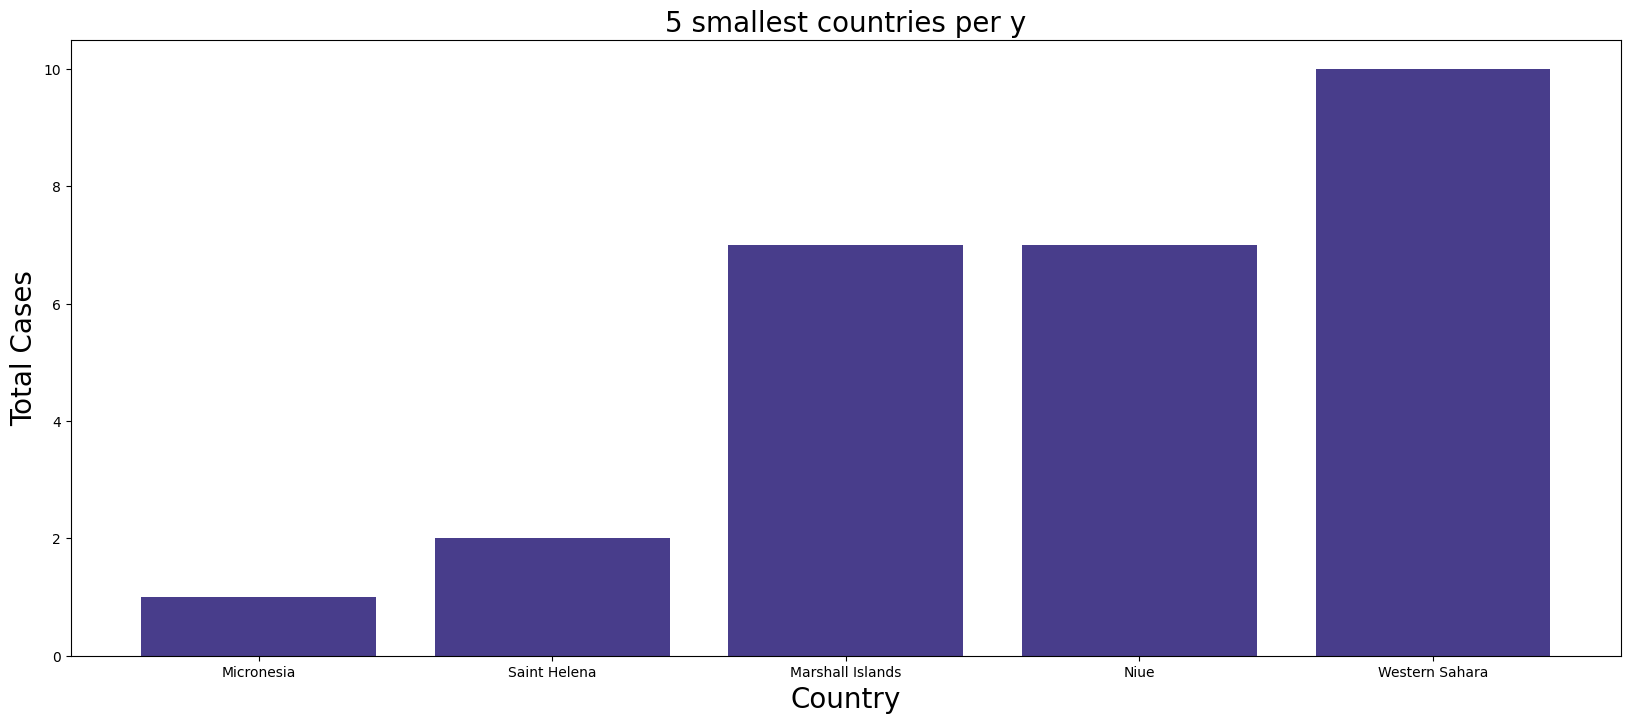

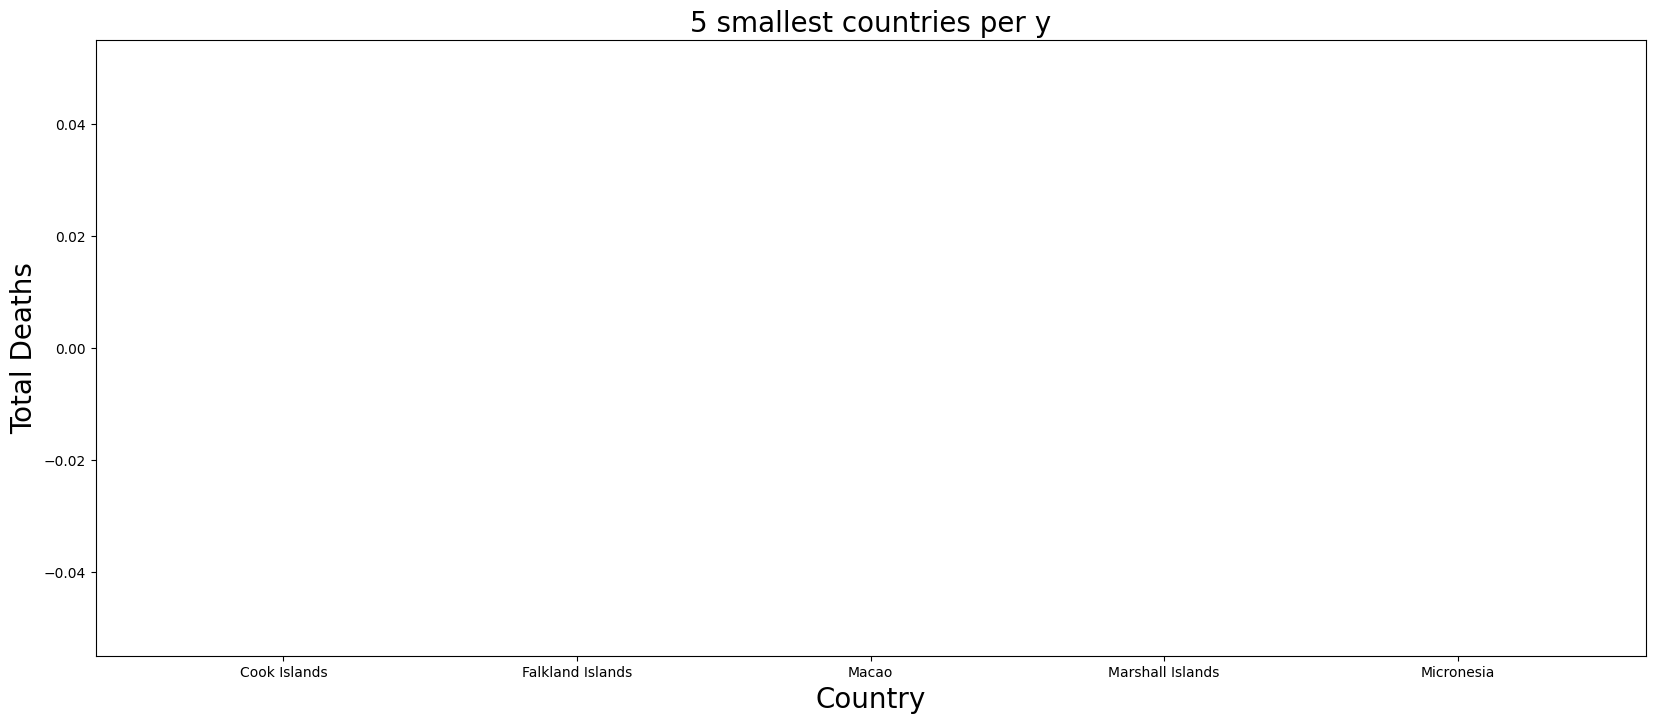

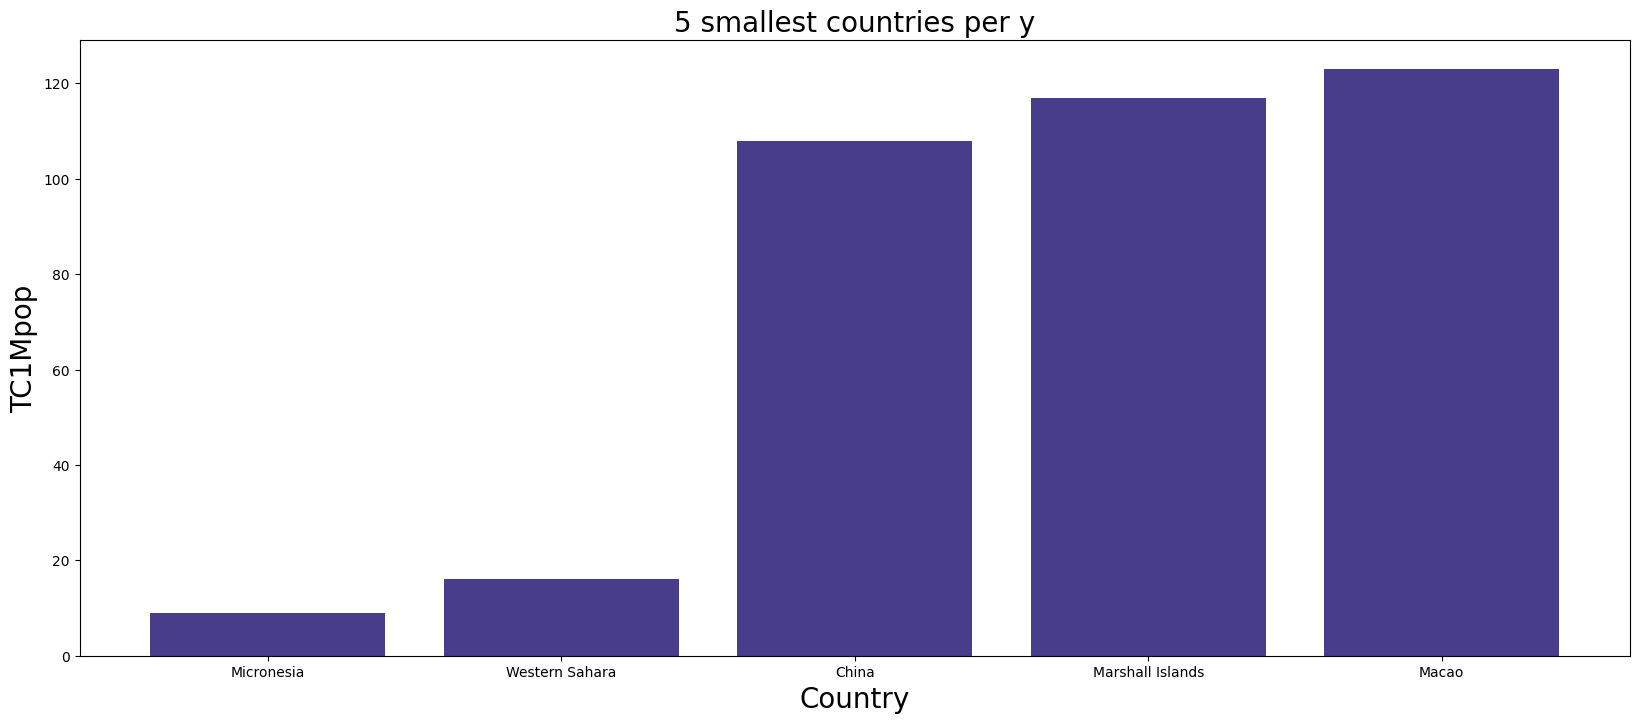

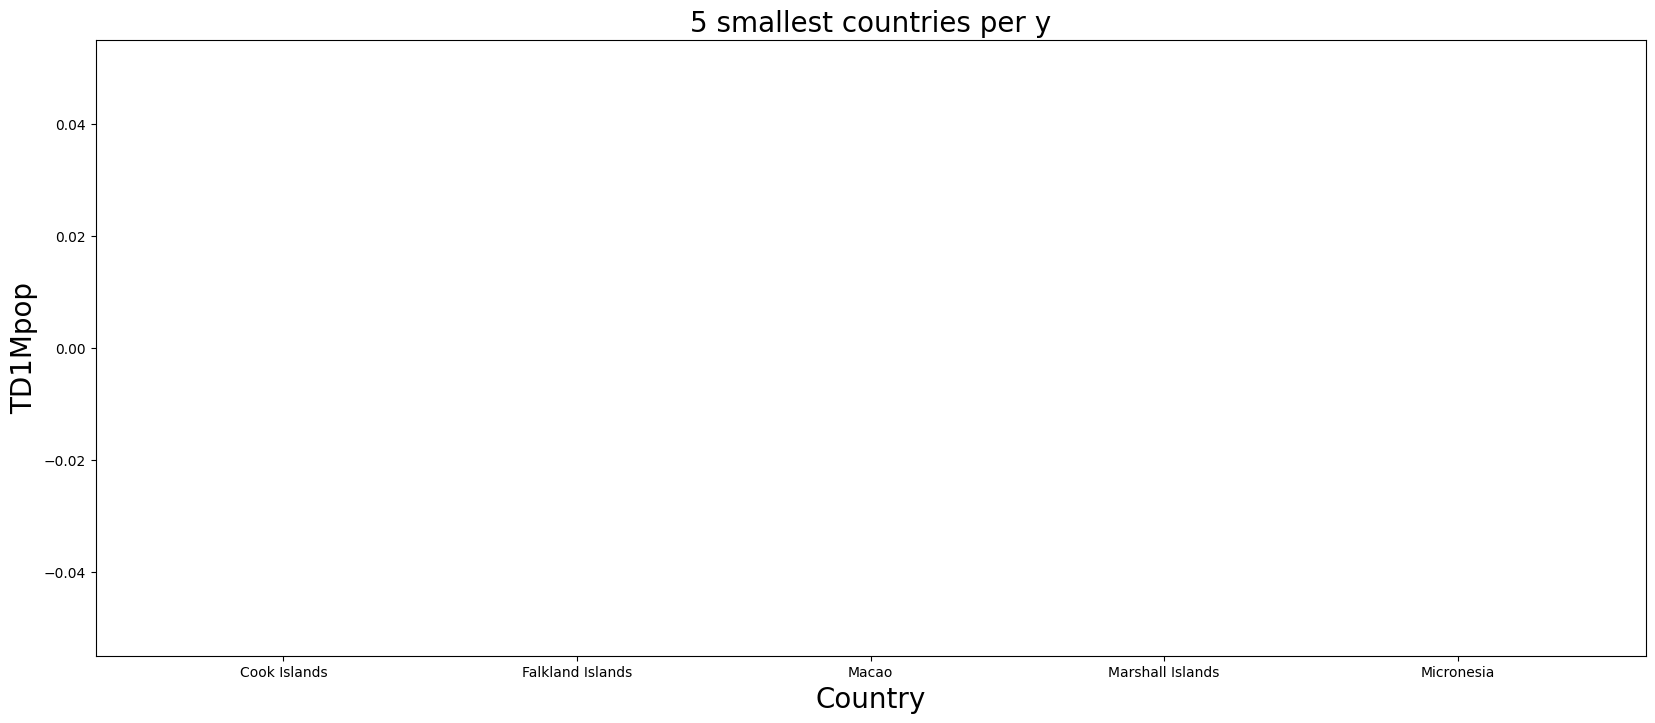

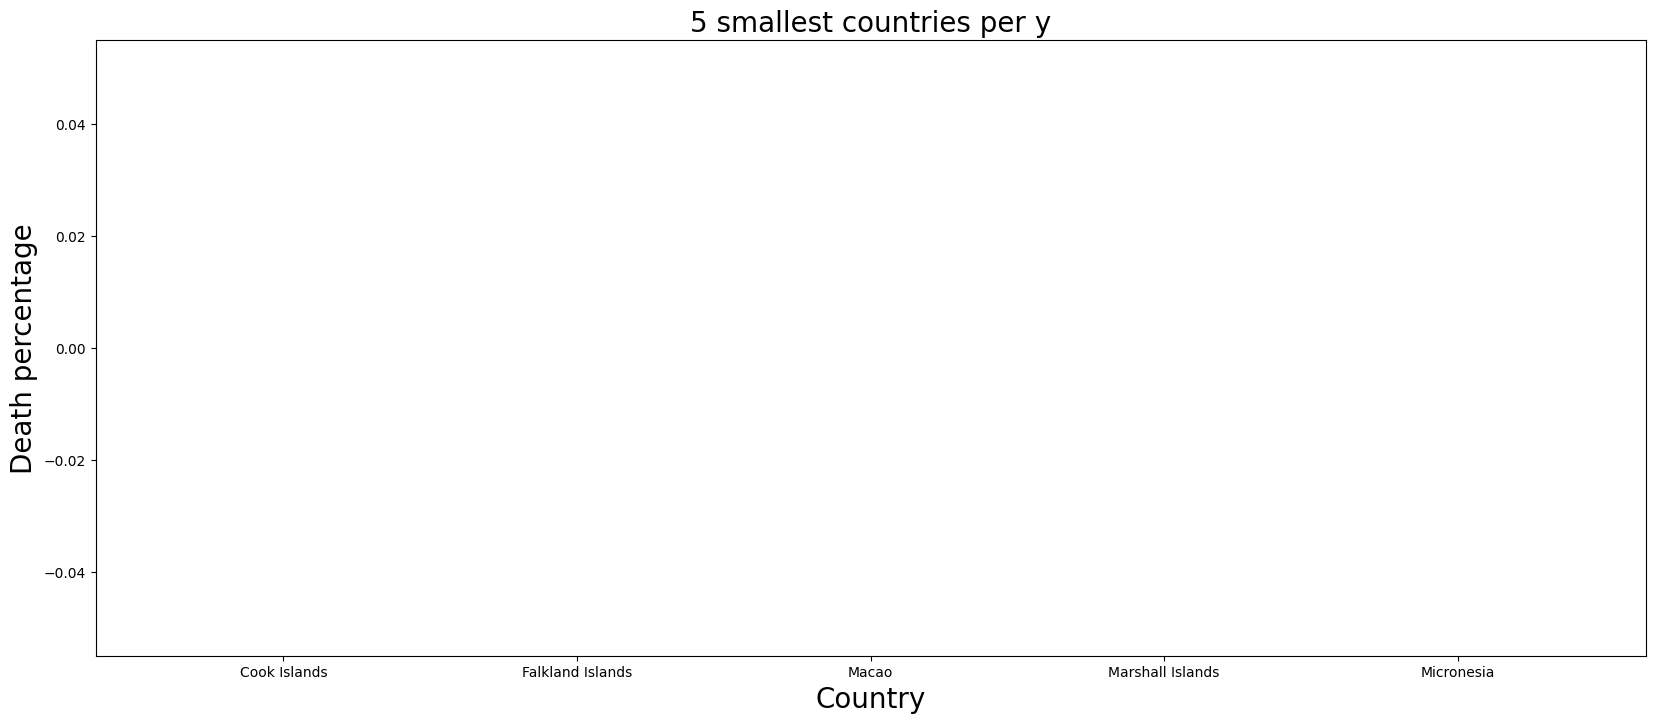

In [18]:
for column in columns:
  top5 = train.nsmallest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="#483D8B",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("5 smallest countries per y", fontsize = 20)
  plt.show()

Усі графіки показують стан справ у карликових державах, за винятком Китаю. Китайська влада робить усе можливе для боротьби з поширенням вірусу. Оскільки Китай має великий досвід у боротьбі з цією хворобою, було одразу введено локдаун, заходи з дезінфекції міських вулиць, масове тестування та ефективну систему охорони здоров’я. Незважаючи на китайське походження вірусу та високу щільність населення, вдалося запобігти поширенню вірусу в країні. Є лише один висновок — або Китай справді добре справляється і дуже швидко реагує на виниклі труднощі, або вони довго готувалися до цієї пандемії.

## Пропоную скласти невеликий антирейтинг європейських країн за різними показниками, а також зробити висновки щодо окремих країн.









In [19]:
Europe=train[train['Continent']=='Europe']

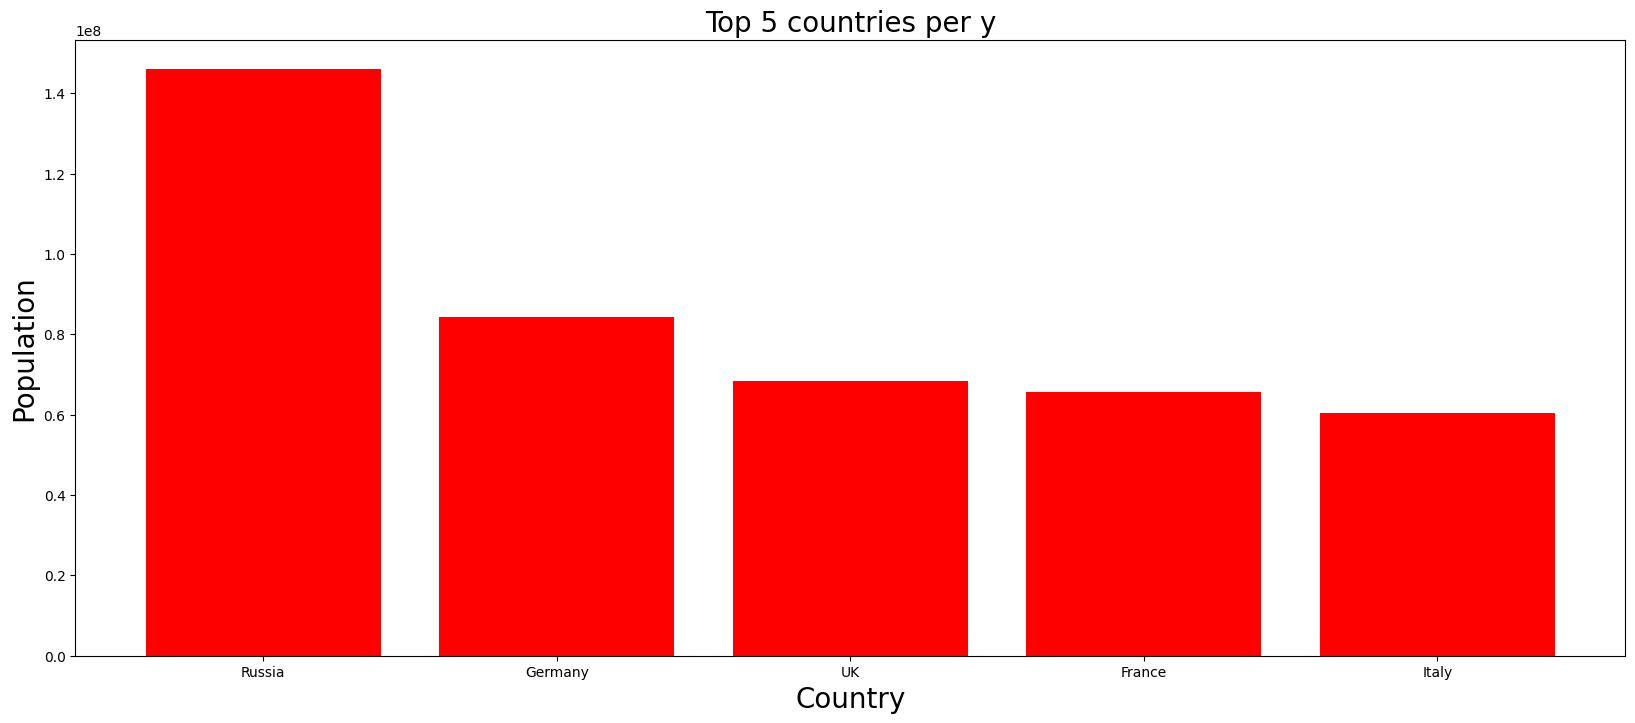

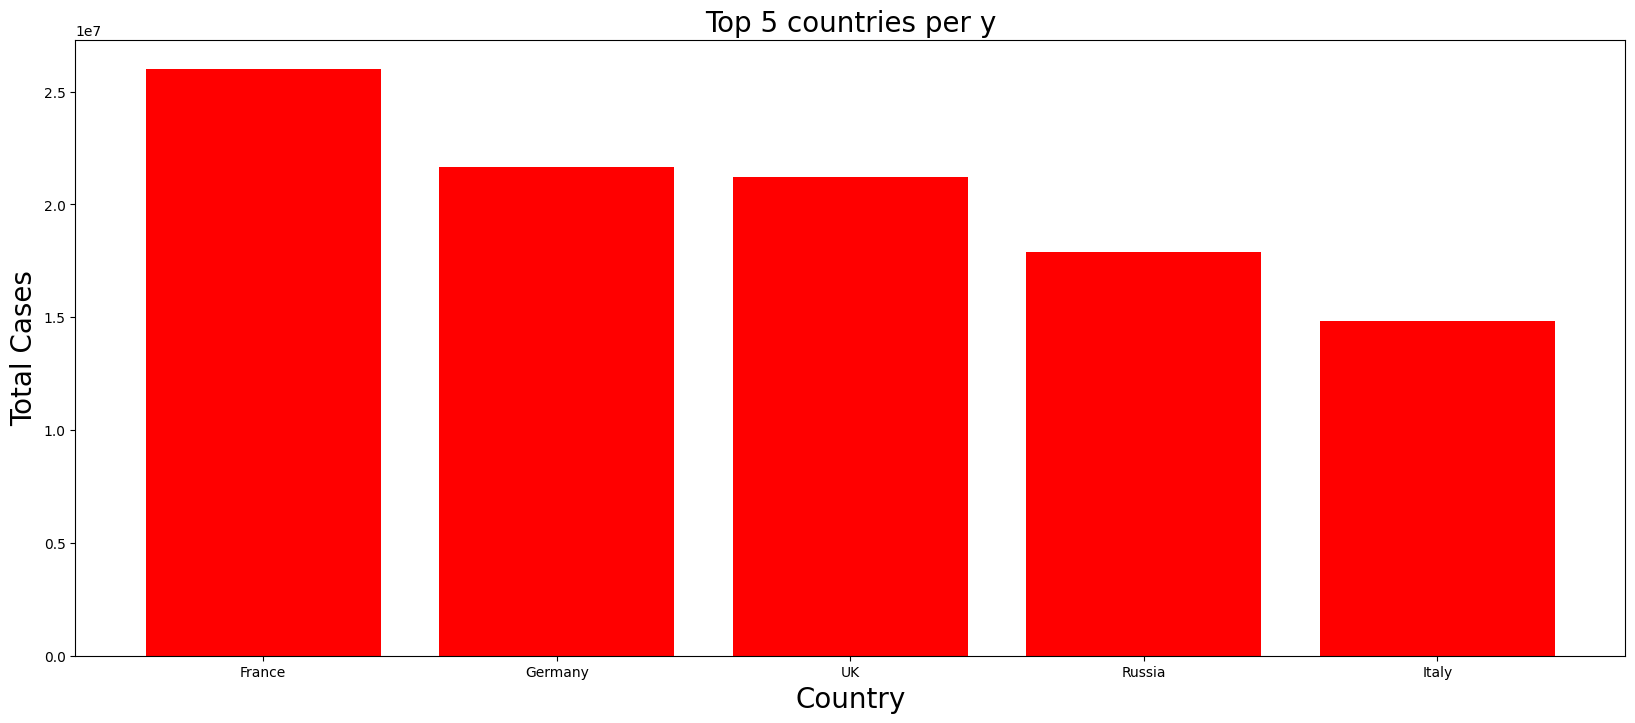

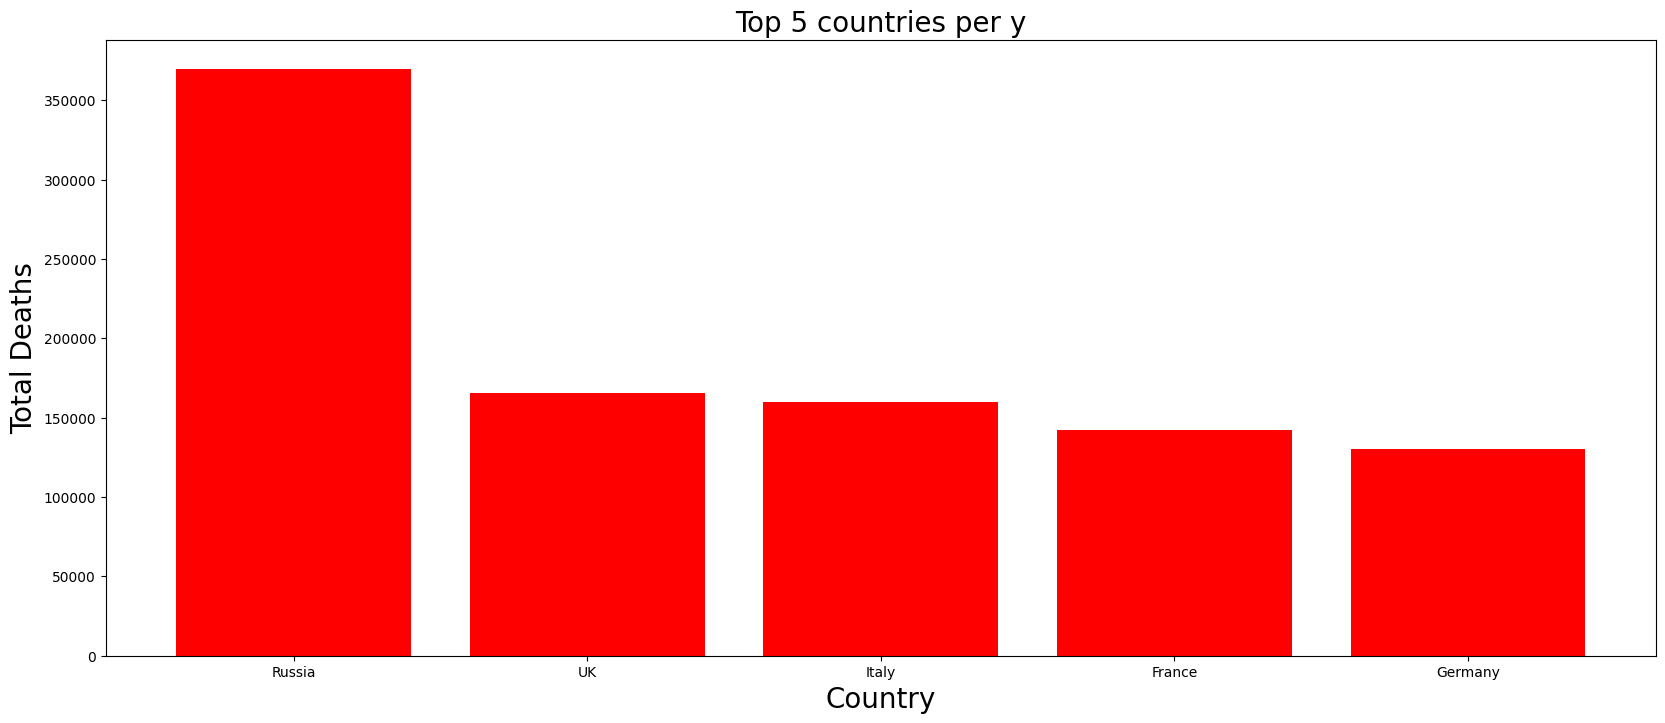

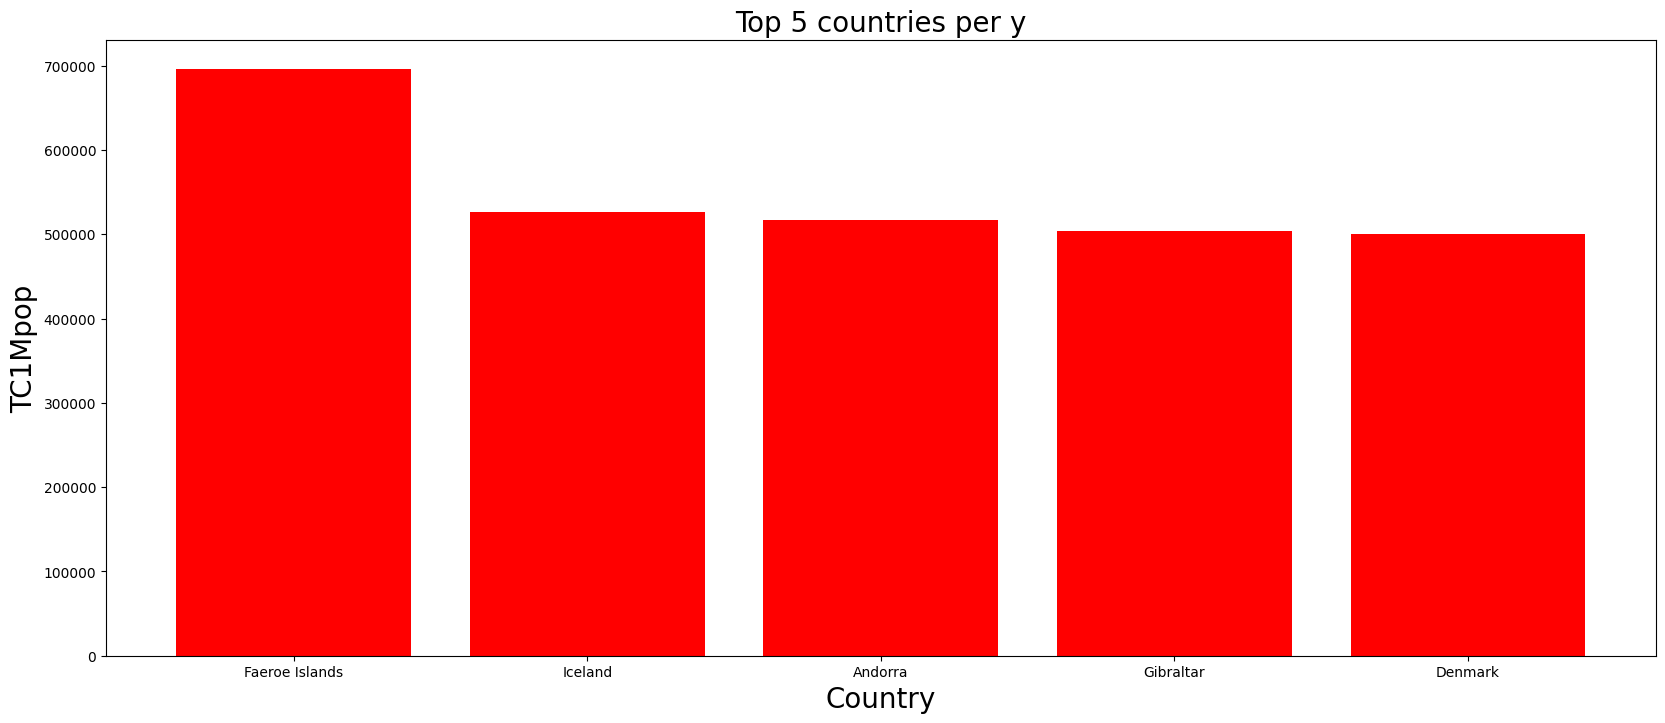

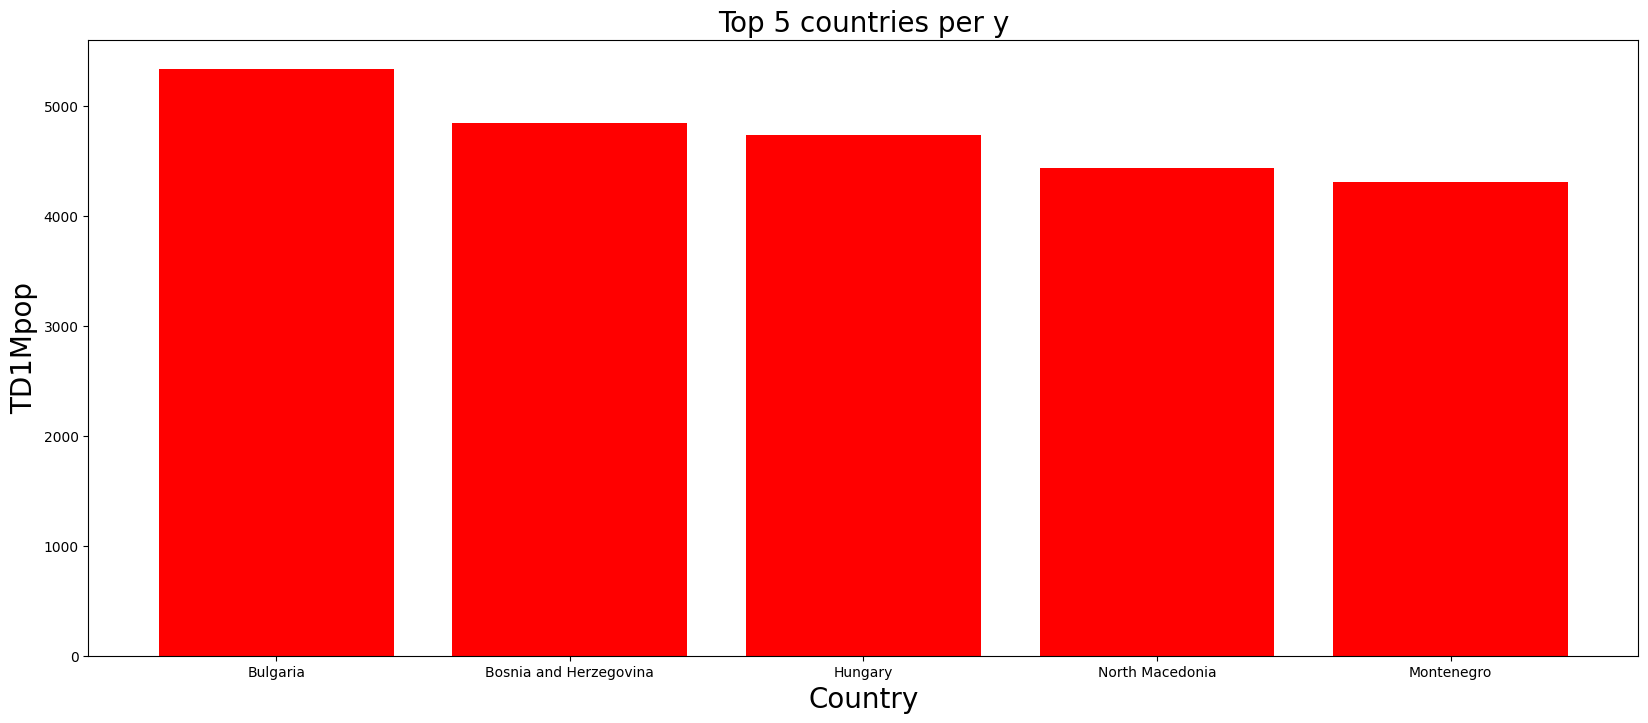

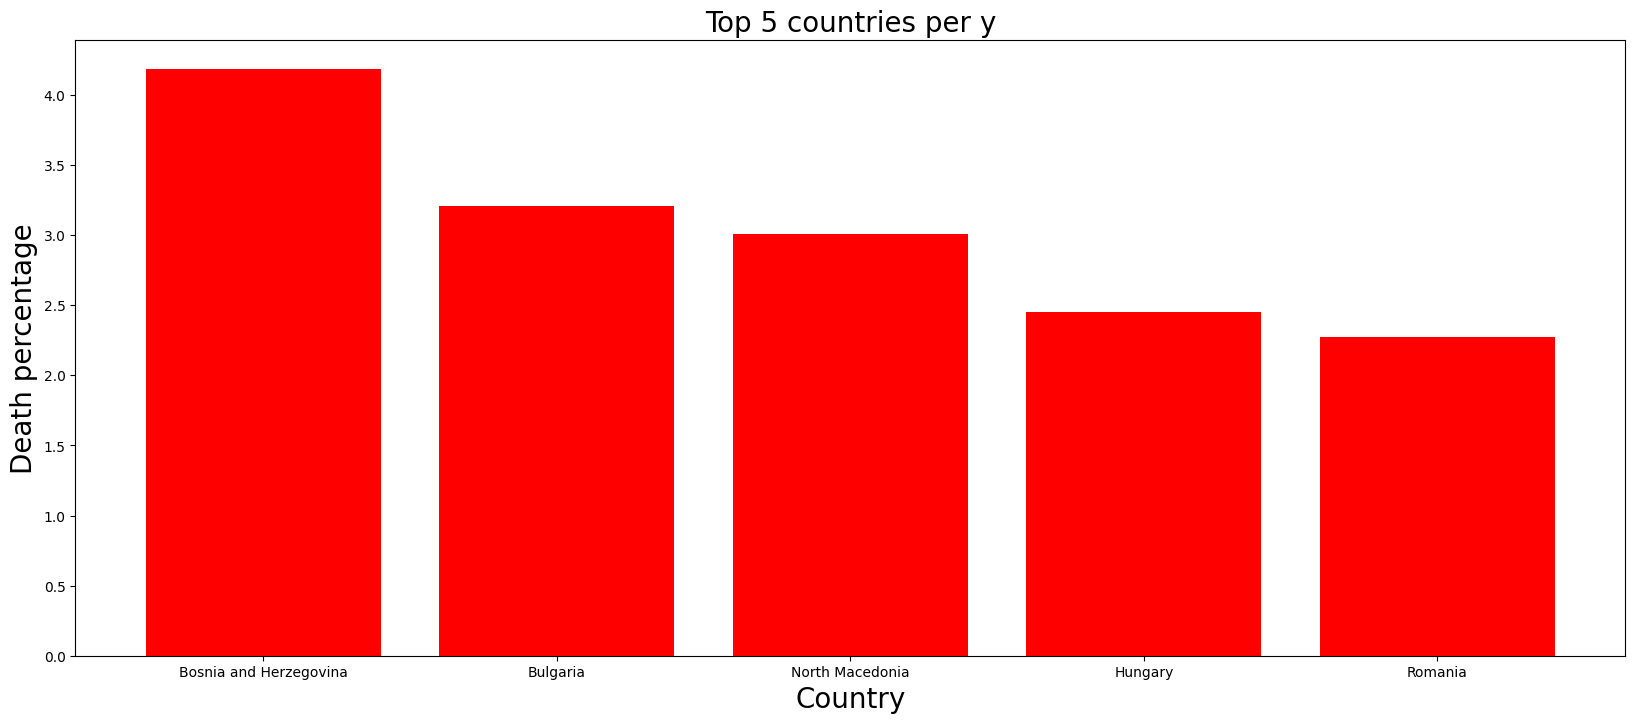

In [20]:
for column in columns:
  top5 = Europe.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="red",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

Загальні висновки підтверджуються: за наявності розвиненої медицини смертність була низькою, захворюваність корелює з розміром населення та пояснюється відсутністю заходів для запобігання поширенню коронавірусної інфекції.










## Давайте проаналізуємо взаємодію змінних між собою.










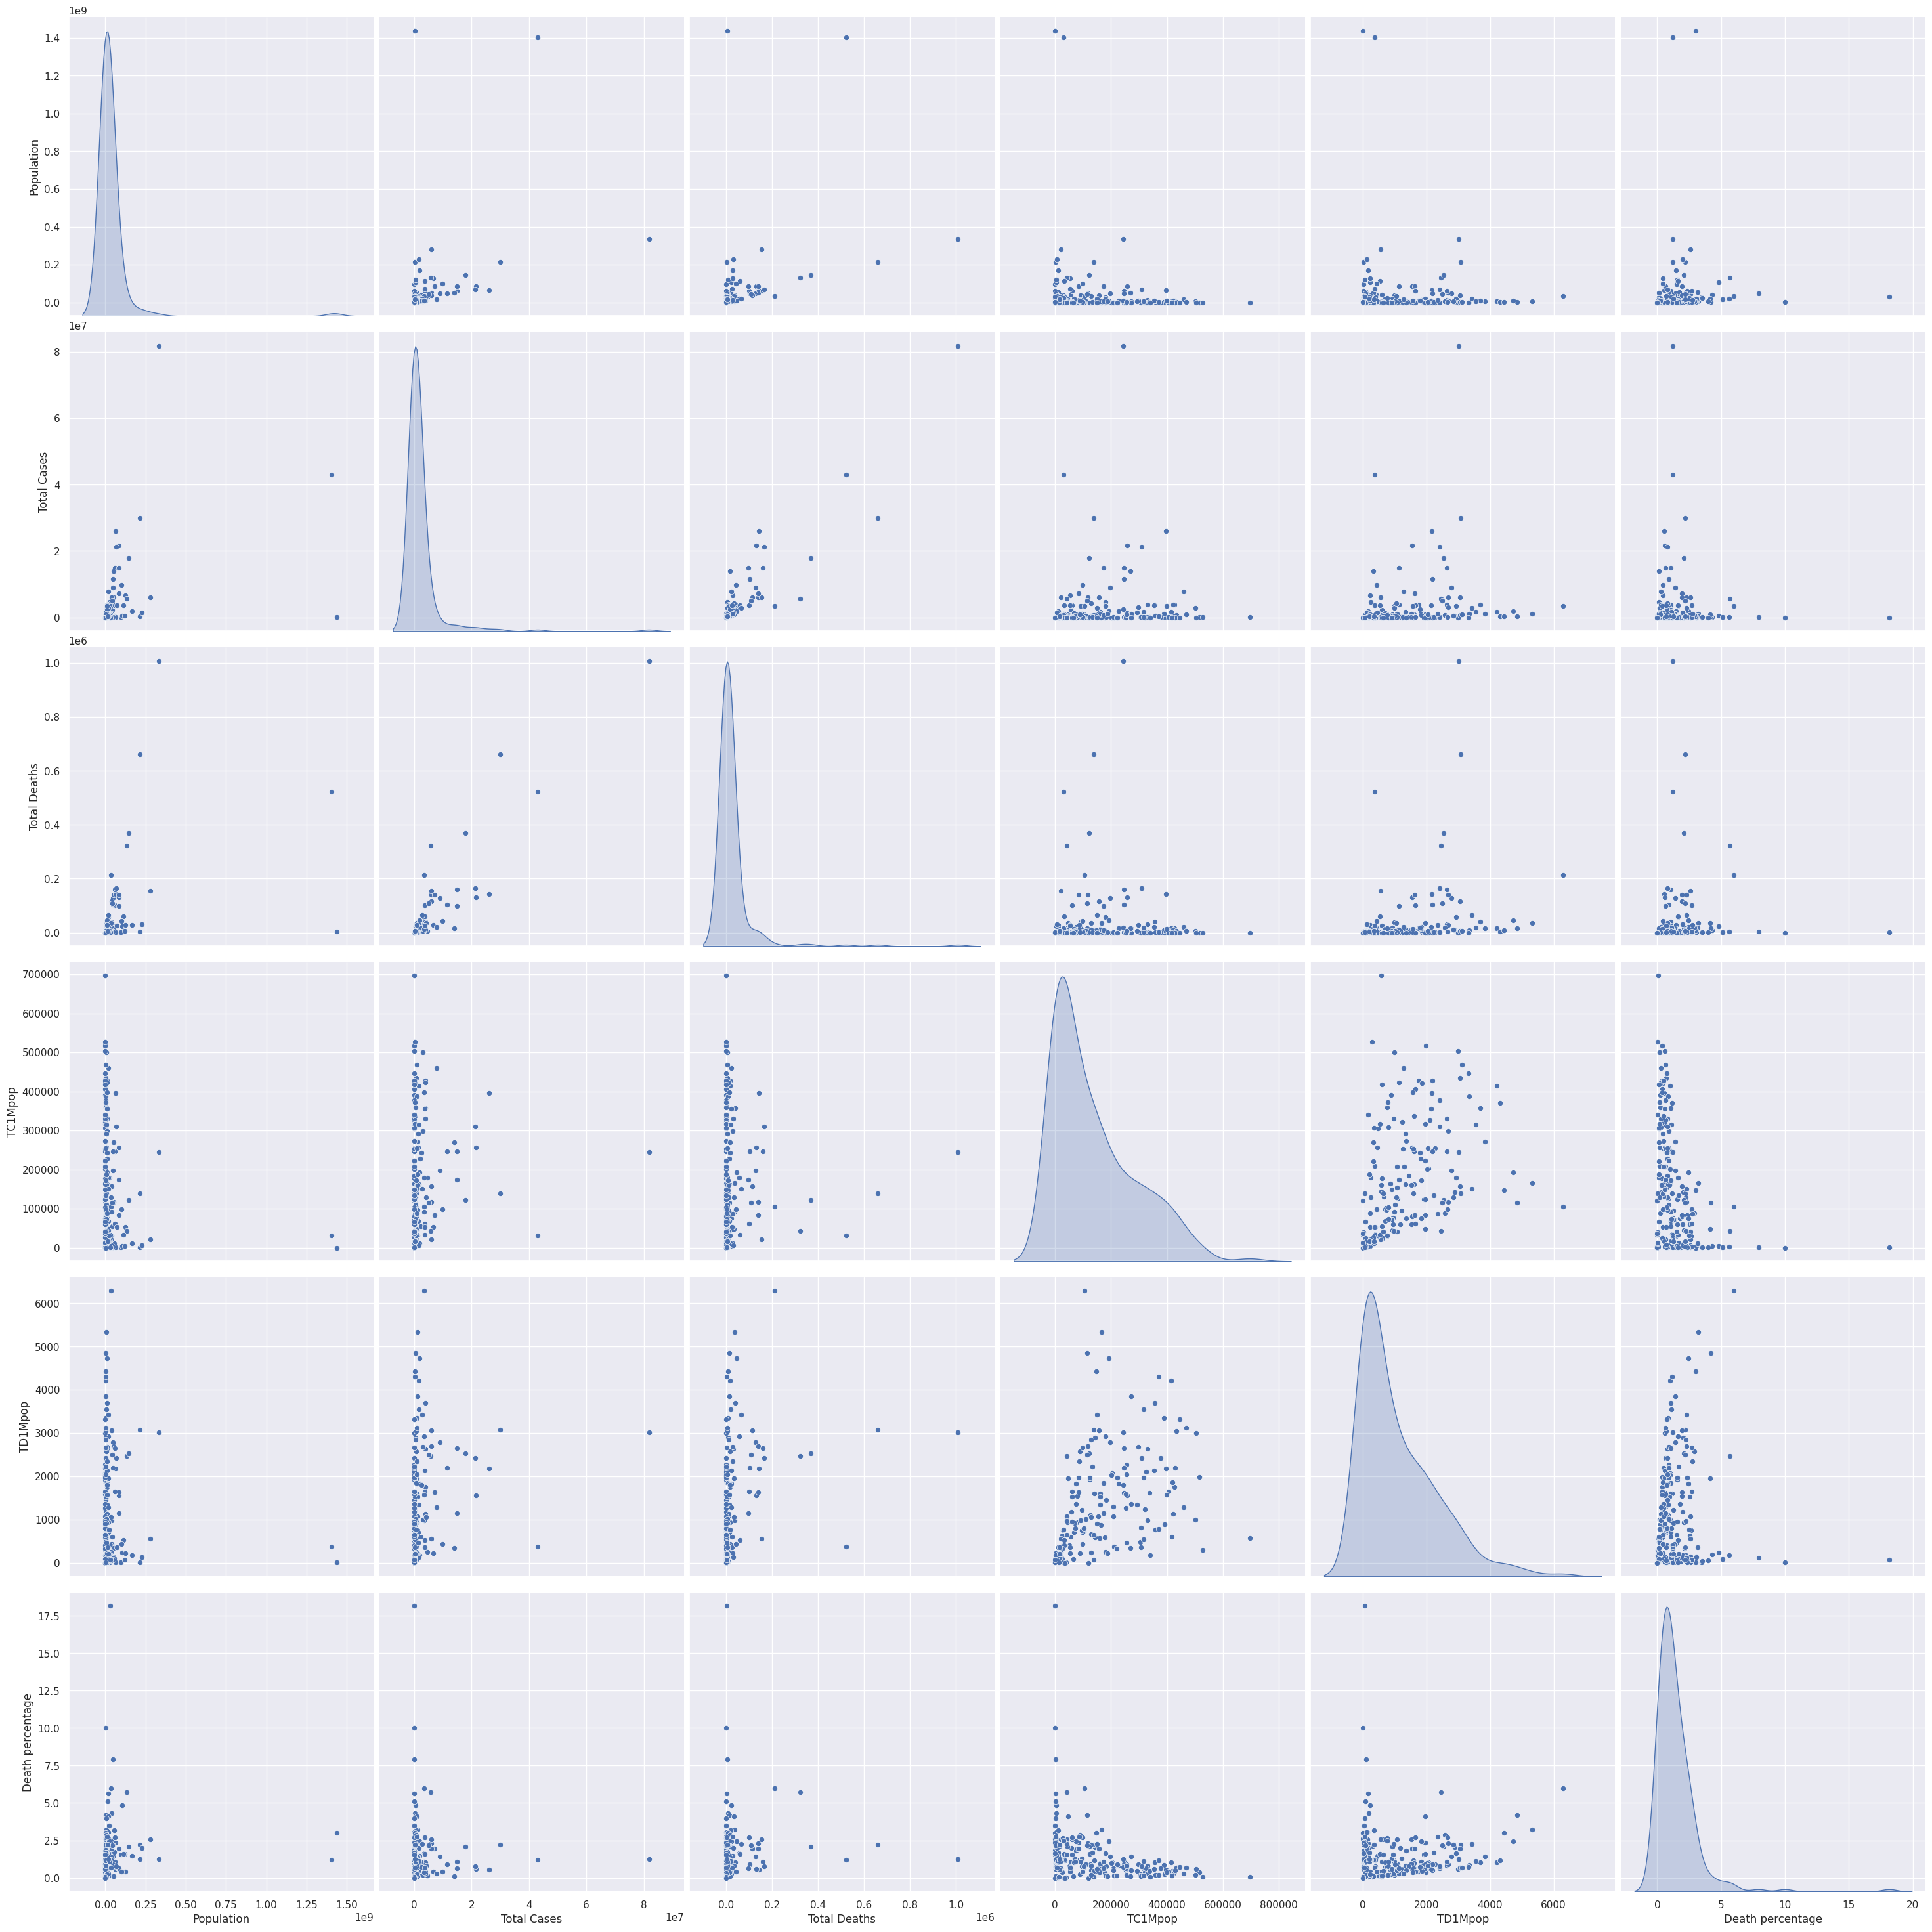

In [21]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

З представлених графіків можна зробити висновок, що в більшості країн ситуація була дуже схожою.










## Давайте проаналізуємо інформаційні викиди.










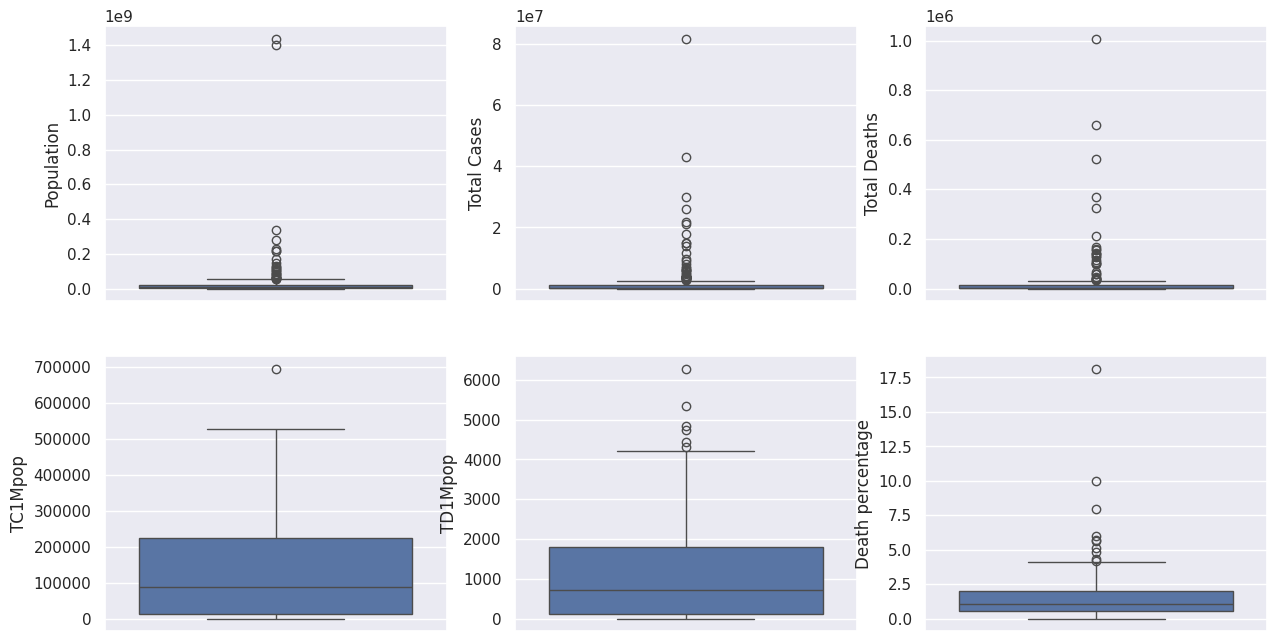

In [22]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1


З представлених графіків випливає, що інформаційних викидів небагато, але вони присутні. При роботі з викидами важливо пам’ятати про розрізнення викидів та унікальної інформації.










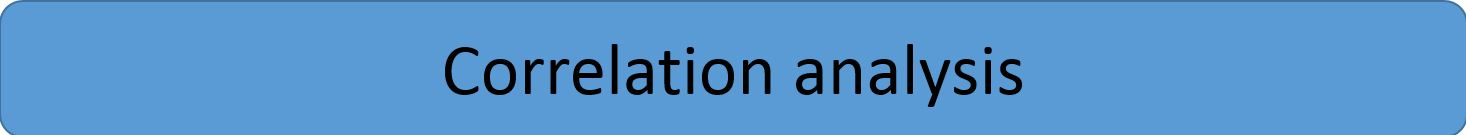

## Побудова таблиці кореляцій.
Я вважаю, що більш інформативним показником для побудови цієї таблиці буде кількість смертей на 1 мільйон населення.

In [24]:
# Вибираємо лише числові колонки
numeric_train = train.select_dtypes(include=['number'])

# Обчислюємо кореляцію серед числових колонок
correlation = numeric_train.corr()

# Виводимо кореляцію з колонкою 'TD1Mpop'
print(correlation['TD1Mpop'].sort_values(ascending=False), '\n')


TD1Mpop             1.000000
TC1Mpop             0.508630
Total Deaths        0.289201
Total Cases         0.216272
Death percentage    0.061088
Population         -0.066485
Name: TD1Mpop, dtype: float64 



Index(['TD1Mpop', 'TC1Mpop', 'Total Deaths', 'Total Cases', 'Death percentage',
       'Population'],
      dtype='object')


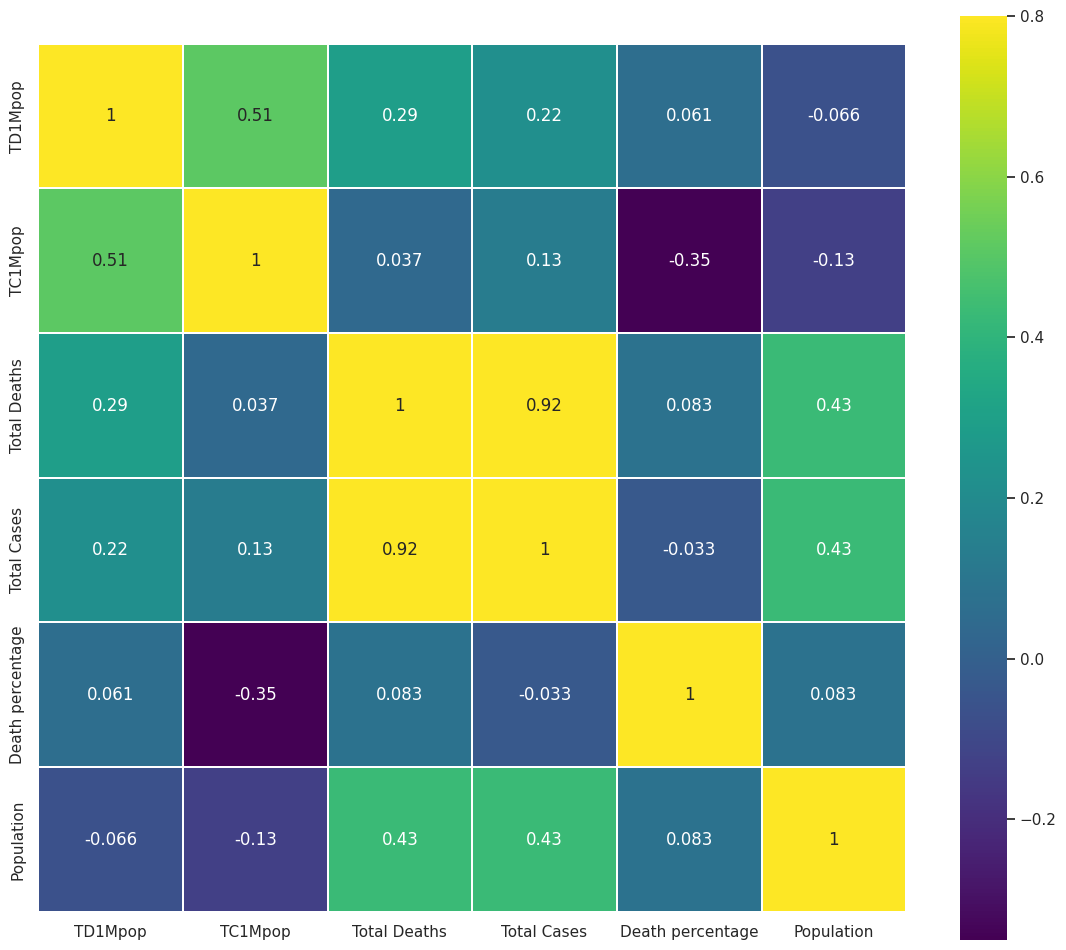

In [25]:
k= 10
cols = correlation.nlargest(k,'TD1Mpop')['TD1Mpop'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

Спостерігається висока кореляція між кількістю випадків та кількістю смертей, що загалом логічно.










Пропоную привести таблицю до вигляду, в якому можна провести кластерний аналіз. Для цього потрібно видалити змінну «континент» і зробити змінну «країна» індексом.










In [26]:
train=train.drop(['Continent'],axis=1).set_index('Country')

In [27]:
train

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
Country,,,,,,
Afghanistan,40462186,177827,7671,4395,190,4.313743
Albania,2872296,273870,3492,95349,1216,1.275058
Algeria,45236699,265691,6874,5873,152,2.587216
Andorra,77481,40024,153,516565,1975,0.382271
Angola,34654212,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...
Wallis and Futuna,10894,454,7,41674,643,1.541850
Western Sahara,623031,10,1,16,2,10.000000
Yemen,30975258,11806,2143,381,69,18.151787


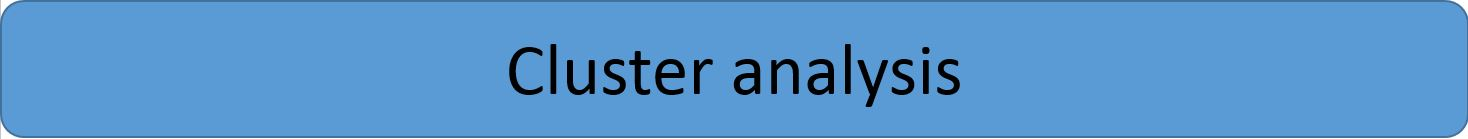

Давайте проведемо кластерний аналіз, для цього перетворимо наші дані у відповідний формат.








[0,1].

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,0.028111,0.002173,0.007608,0.006301,0.030226,0.237648
1,0.001995,0.003346,0.003464,0.136976,0.193446,0.070244
2,0.031429,0.003246,0.006818,0.008425,0.024181,0.142532
3,0.000053,0.000489,0.000152,0.742141,0.314190,0.021060
4,0.024076,0.001212,0.001885,0.004099,0.008750,0.105523


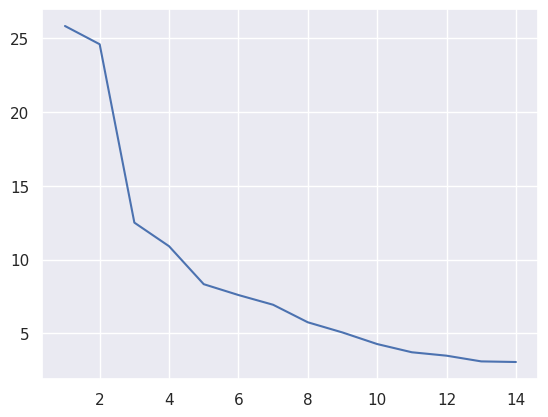

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.show()

Оптимальна кількість кластерів — 4.










Оскільки даних небагато, обробка викидів не передбачена, але я хочу показати, як швидко можна опрацьовувати викиди за допомогою методу LocalOutlierFactor. Змінюючи гіперпараметри методу LocalOutlierFactor, можна контролювати кількість викидів, які потрібно видалити.










In [31]:
from sklearn.neighbors import LocalOutlierFactor

In [32]:
clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred = clf.fit_predict(train)

In [33]:
train['Out']=y_pred

In [34]:
Out=train[train['Out']!=1]

In [35]:
Out.shape

(11, 7)

In [36]:
train=train.drop('Out',axis=1)

Рекомендації щодо видалення викидів — не більше 1–2 відсотків, інакше можна втратити важливу інформацію.










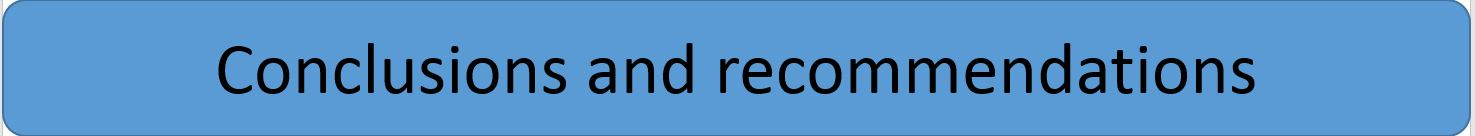

Загальні висновки та рекомендації щодо цього набору даних і COVID-19:

Від самого початку спалаху COVID-19 у мережі швидко поширювалися фейки та дезінформація про походження, масштаби, профілактику, лікування та інші аспекти хвороби. Дезінформація може коштувати життя. Недостатній рівень довіри та відсутність надійної інформації може негативно вплинути на діагностику, а імунізаційні кампанії серед населення можуть не досягти своїх цілей, і вірус продовжить циркулювати. Також під час пандемії виникла проблема ковід-дисидентів — людей, які не вірять у існування вірусу або суттєво применшують значення проблеми. Такі люди можуть не носити маски, не дотримуватися соціальної дистанції чи урядових рекомендацій, а також не звертатися по медичну допомогу у разі захворювання. Є випадки, коли такі люди згодом опинялися у відділеннях інтенсивної терапії або були на межі смерті, але вже не могли нічого змінити.

Поширення точної та надійної інформації через платформи соціальних мереж є ключовим у боротьбі з інфодемією, дезінформацією та чутками. У спільній заяві ВООЗ, ООН, ЮНІСЕФ та інших організацій закликали країни — члени ООН розробити та впровадити плани протидії поширенню інфодемії шляхом своєчасного розповсюдження науково обґрунтованої інформації у всіх спільнотах, особливо серед людей у групі ризику, а також боротьби з дезінформацією, водночас поважаючи свободу слова.

Під час пандемії найефективнішою мірою запобігання поширенню інфекції є контроль її джерел, включаючи ранню діагностику, своєчасне повідомлення про випадки захворювання, ізоляцію пацієнтів, а також періодичне інформування населення про ситуацію і підтримання порядку. Багато країн впроваджують заходи соціального дистанціювання, зокрема обмеження пересування між містами, закриття шкіл і університетів, перехід на дистанційну роботу та карантин для хворих. Такі заходи допомагають уповільнити поширення інфекції. Масові заходи можуть бути мінімізовані або відкладені. Під час пандемії COVID-19 карантин відіграє важливу роль у сповільненні поширення інфекції та зниженні смертності, за даними моделювань, але ще більший ефект досягається впровадженням карантину разом із іншими профілактичними чи контрольними заходами.
У країнах із чіткою зміною сезонів, де сезонні коронавіруси поширюються краще взимку, має сенс посилити заходи для зменшення поширення інфекції саме в зимовий період.

Будьте здорові та не хворійте, піклуйтеся про своїх близьких!



# Дякую за перегляд мого кернела! Оцініть, будь ласка, та залиште коментарі з ідеями, що б ви хотіли дослідити або додати до моєї роботи!








